# Data Preprocessing / Exploratory Data Analysis

Objective: Clean the data and vizualize to prepare for ML modeling. 

## Data Cleaning
1. Handling of NaN values and duplicates
2. Dropping unnecessary columns
3. Dropping rows where OBJECT_TYPE is unknown

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("data/space_debris_kaggle.csv")
df.head()

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,...,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,...,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,...,LARGE,IND,2001.0,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,...,SMALL,PRC,1999.0,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...


In [67]:
df.columns

Index(['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR',
       'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM',
       'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID',
       'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE',
       'DECAY_DATE', 'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'],
      dtype='object')

In [68]:
#Drop columns with only one unique value
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=cols_to_drop, inplace=True)

In [69]:
#Dropping DECAY_DATE as all the columns are Nan
df.drop(columns=['DECAY_DATE'], inplace=True)

In [70]:
#Drop remaining unnecessary columns
cols_to_drop = [
    'CREATION_DATE','NORAD_CAT_ID','FILE', 'GP_ID'
]
df = df.drop(columns=cols_to_drop)

In [71]:
#Check which columns have NaN values
print(df.isnull().sum())

OBJECT_NAME            0
OBJECT_ID             39
EPOCH                  0
MEAN_MOTION            0
ECCENTRICITY           0
INCLINATION            0
RA_OF_ASC_NODE         0
ARG_OF_PERICENTER      0
MEAN_ANOMALY           0
REV_AT_EPOCH           0
BSTAR                  0
MEAN_MOTION_DOT        0
MEAN_MOTION_DDOT       0
SEMIMAJOR_AXIS         0
PERIOD                 0
APOAPSIS               0
PERIAPSIS              0
OBJECT_TYPE            0
RCS_SIZE             198
COUNTRY_CODE          39
LAUNCH_DATE           39
SITE                  39
TLE_LINE0              0
TLE_LINE1              0
TLE_LINE2              0
dtype: int64


In [72]:
print(df.duplicated().sum())

0


In [73]:
#Checking values in target for classification
df['OBJECT_TYPE'].value_counts()

OBJECT_TYPE
DEBRIS         8431
PAYLOAD        4950
ROCKET BODY     744
TBA             247
Name: count, dtype: int64

In [74]:
# Handle missing OBJECT_ID based on OBJECT_TYPE
df['OBJECT_ID'].fillna('Unknown', inplace=True)

/tmp/ipykernel_5836/2732867745.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OBJECT_ID'].fillna('Unknown', inplace=True)


In [75]:
df['RCS_SIZE'].value_counts()

RCS_SIZE
SMALL     8346
LARGE     4189
MEDIUM    1639
Name: count, dtype: int64

In [76]:
#Removing rows where OBJECT_TYPE is TBA
df = df[df['OBJECT_TYPE'] != 'TBA']

In [77]:
#Fill in NaN values
df['COUNTRY_CODE'].fillna(df['COUNTRY_CODE'].mode()[0], inplace=True)
df['LAUNCH_DATE'].fillna(df['LAUNCH_DATE'].mode()[0], inplace=True)
df['SITE'].fillna(df['SITE'].mode()[0], inplace=True)

/tmp/ipykernel_5836/1035783799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['COUNTRY_CODE'].fillna(df['COUNTRY_CODE'].mode()[0], inplace=True)
/tmp/ipykernel_5836/1035783799.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [78]:
#Replace missing RCS size data with Unknown
df['RCS_SIZE'].fillna('UNKNOWN', inplace=True)

/tmp/ipykernel_5836/1982397648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RCS_SIZE'].fillna('UNKNOWN', inplace=True)


In [79]:
print(df.isnull().sum())

OBJECT_NAME          0
OBJECT_ID            0
EPOCH                0
MEAN_MOTION          0
ECCENTRICITY         0
INCLINATION          0
RA_OF_ASC_NODE       0
ARG_OF_PERICENTER    0
MEAN_ANOMALY         0
REV_AT_EPOCH         0
BSTAR                0
MEAN_MOTION_DOT      0
MEAN_MOTION_DDOT     0
SEMIMAJOR_AXIS       0
PERIOD               0
APOAPSIS             0
PERIAPSIS            0
OBJECT_TYPE          0
RCS_SIZE             0
COUNTRY_CODE         0
LAUNCH_DATE          0
SITE                 0
TLE_LINE0            0
TLE_LINE1            0
TLE_LINE2            0
dtype: int64


## Splitting of Features and Target
1. Label Encoding Target (OBJECT_TYPE)
2. Splitting into X and Y

In [80]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode OBJECT_TYPE
df['OBJECT_TYPE_ENCODED'] = label_encoder.fit_transform(df['OBJECT_TYPE'])

# Split into X and Y
X = df.drop(columns=['OBJECT_TYPE', 'OBJECT_TYPE_ENCODED'])  # Features
Y = df['OBJECT_TYPE_ENCODED']  # Encoded target

## Data Preprocessing and Exploratory Data Analysis
1. Encoding categorical features
2. Scaling numerical features 

In [89]:
df.describe()

,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,LAUNCH_DATE,OBJECT_TYPE_ENCODED
count,14125.000000,14125.000000,14125.000000,14125.000000,14125.000000,14125.000000,14125.000000,14125.000000,14125.000000,1.412500e+04,14125.00000,14125.000000,14125.000000,14125.000000,14125.000000,14125.000000
mean,12.423639,0.068144,74.128021,183.373056,165.756693,191.072971,33307.237805,-0.000595,0.000048,1.931626e-07,10697.62528,225.666201,5805.217505,2833.763059,2004.300319,0.455788
std,4.534790,0.182790,29.727391,116.527726,104.495273,109.965549,28520.284341,0.032511,0.002410,1.420768e-05,9650.83432,450.071151,13108.928036,8006.704395,13.544529,0.594488
min,0.051783,0.000005,0.001400,0.020000,0.008200,0.004800,0.000000,-0.796460,-0.014873,-4.210300e-05,6542.85000,87.783000,183.393000,73.279000,1961.000000,0.000000
25%,13.442620,0.000699,53.055200,72.456400,77.288200,90.041700,5916.000000,0.000057,0.000001,0.000000e+00,6967.03900,96.457000,609.732000,546.152000,1997.000000,0.000000
50%,14.267312,0.003525,86.346000,190.919200,149.564800,207.313600,29446.000000,0.000278,0.000010,0.000000e+00,7180.81500,100.930000,846.809000,706.063000,2002.000000,0.000000
75%,14.928988,0.013719,98.582000,293.735100,258.492800,284.272600,62462.000000,0.000843,0.000032,0.000000e+00,7471.58200,107.122000,1211.541000,832.860000,2018.000000,1.000000
max,16.404097,0.897218,144.586200,359.967900,359.989900,359.981900,99945.000000,0.595600,0.225321,1.654800e-03,304049.63500,27808.429000,372136.402000,224547.015000,2021.000000,2.000000


In [87]:
df['RCS_SIZE'].value_counts()

RCS_SIZE
SMALL      8256
LARGE      4170
MEDIUM     1540
UNKNOWN     159
Name: count, dtype: int64

In [82]:
# One Hot Encode RCS_SIZE
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
rcs_size_reshaped = X[['RCS_SIZE']]
rcs_size_encoded = encoder.fit_transform(rcs_size_reshaped)
rcs_size_encoded_df = pd.DataFrame(
    rcs_size_encoded,
    columns=encoder.get_feature_names_out(['RCS_SIZE']),
    index=X.index
)

X = pd.concat([X, rcs_size_encoded_df], axis=1)
X.drop(columns=['RCS_SIZE'], inplace=True)


In [94]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_features)

Index(['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'REV_AT_EPOCH', 'BSTAR',
       'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD',
       'APOAPSIS', 'PERIAPSIS', 'LAUNCH_DATE', 'OBJECT_TYPE_ENCODED'],
      dtype='object')


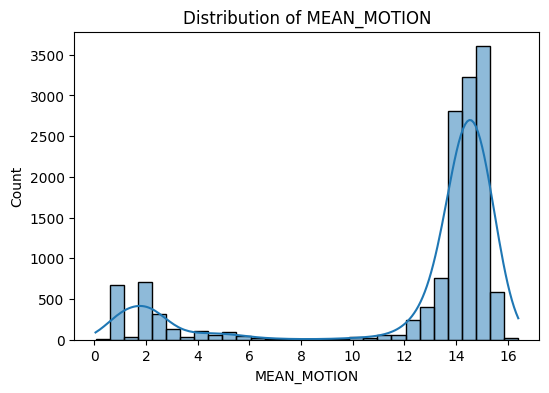

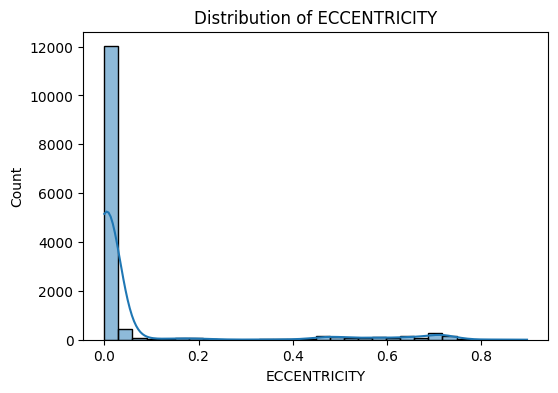

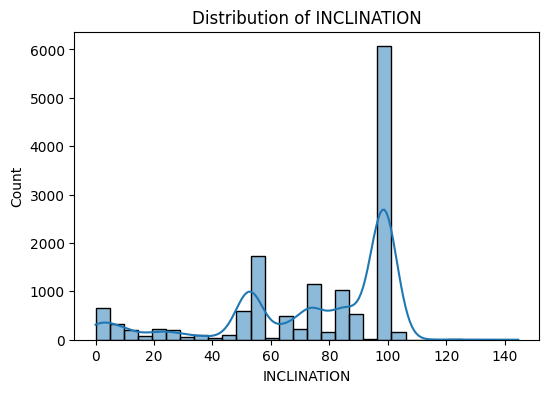

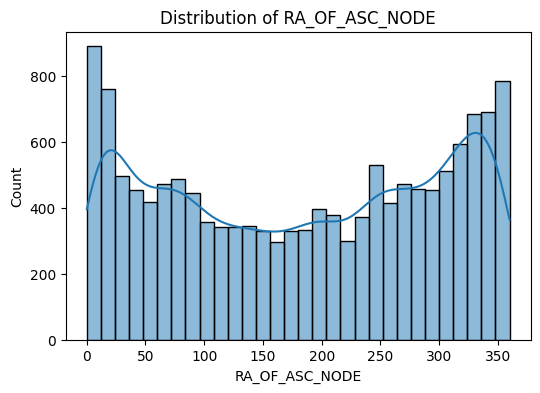

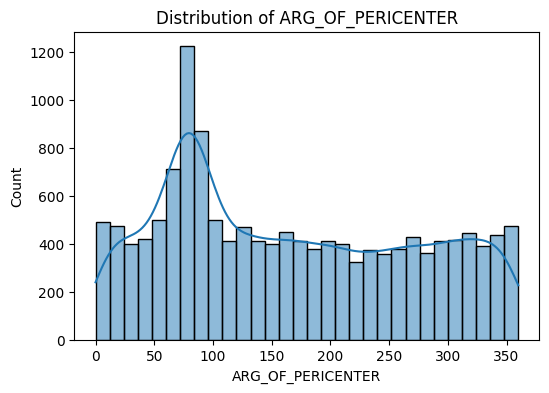

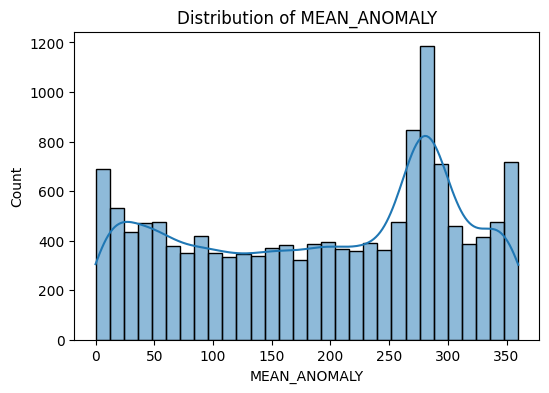

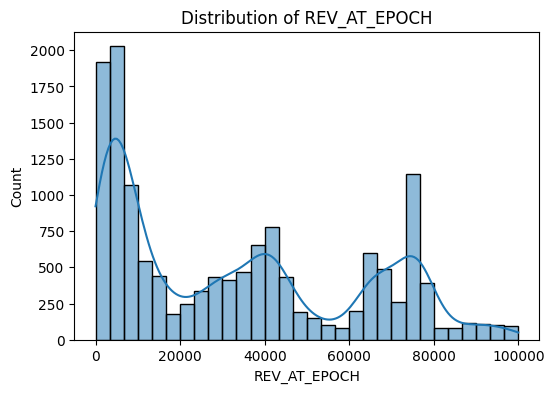

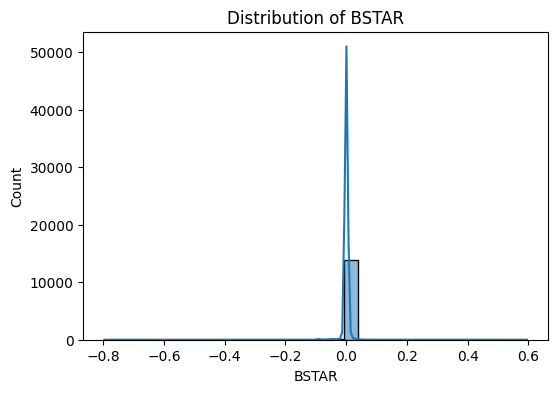

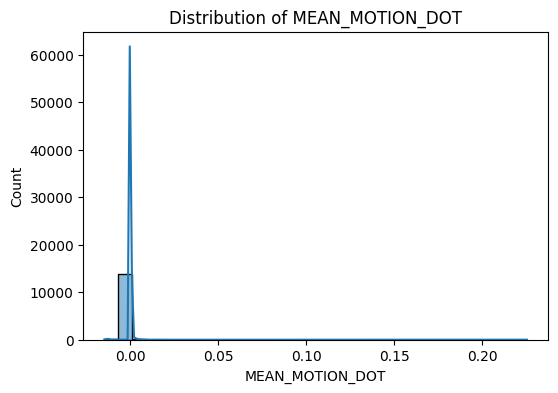

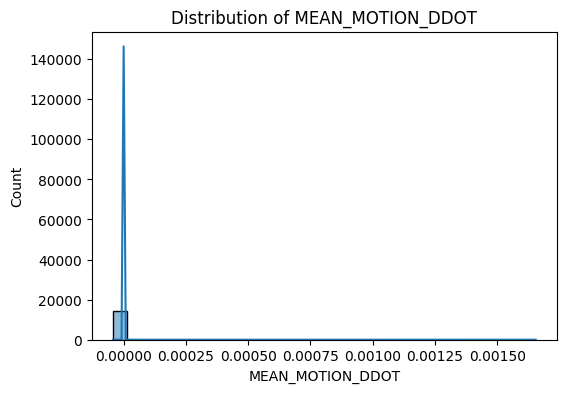

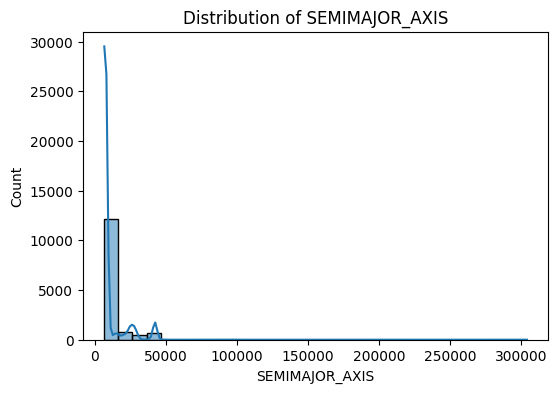

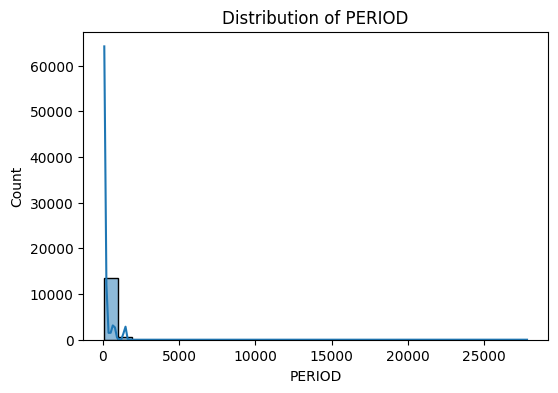

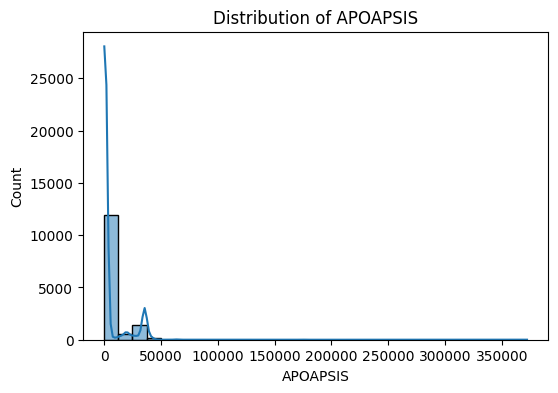

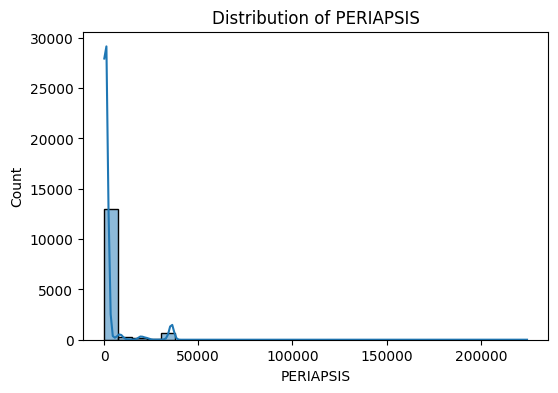

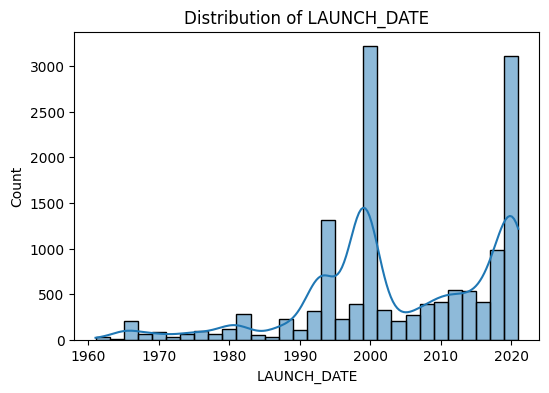

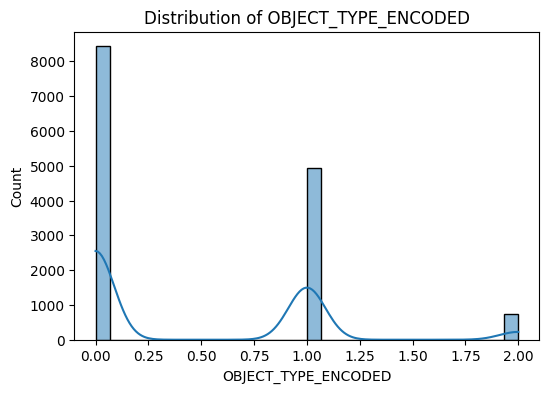

In [95]:
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

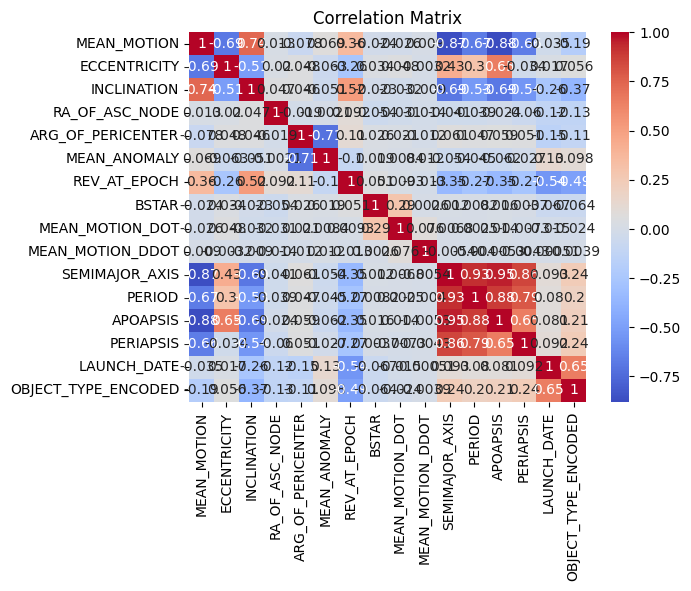

In [97]:
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()